<a href="https://colab.research.google.com/github/Ashi743/ML-practices/blob/main/pca_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [ ]:
train= pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
y= train.iloc[:,0]
x= train.iloc[:, 1:]


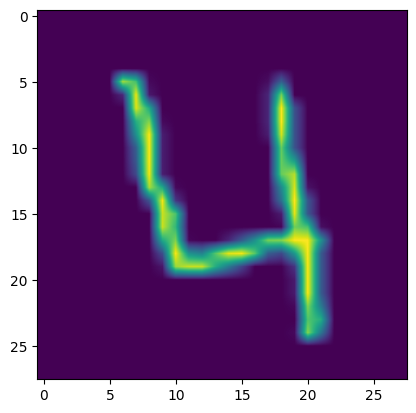

In [ ]:
plt.imshow(x.iloc[3].values.reshape(28,28),interpolation='bilinear' )

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.2, random_state=42)
x_train.shape

(33600, 784)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

import time
start= time.time()
y_pred =knn.predict(x_test)   #will consume a lot of time as 784 features

print(y_pred)
print(time.time()- start)


[8 1 9 ... 3 0 9]
13.93177843093872


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9648809523809524


In [ ]:
#standardize
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca= PCA(n_components= 200)    #same as principal datasets

In [ ]:
X_train_pca= pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca.shape

(33600, 200)

In [ ]:
knn1= KNeighborsClassifier()
knn1.fit(X_train_pca,y_train)

import time
start= time.time()
y_pred1 =knn1.predict(X_test_pca)   #will consume a lot of time as 784 features

print(y_pred1)
print(time.time()- start)


[8 1 9 ... 3 0 9]
2.848947286605835


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred1))

0.9511904761904761


In [ ]:

accuracy_scores = []

for i in range(1, 50,5):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn1 = KNeighborsClassifier()
    knn1.fit(X_train_pca, y_train)

    y_pred1 = knn1.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred1)
    accuracy_scores.append(accuracy)

# Plotting the results
plt.plot(range(1, 50,5), accuracy_scores)
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Principal Components')
plt.show()


KeyboardInterrupt: 

In [ ]:
pca=PCA(n_components= 2)
X_train_trf= pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf

array([[-2.71863504, -0.48984204],
       [-0.67695541, -6.75367052],
       [-3.03325443,  6.50967848],
       ...,
       [ 2.14887176,  0.78080441],
       [ 1.05956212,  0.94777376],
       [17.70262608,  1.9619195 ]])

In [ ]:
import plotly.express as px
y_train_trf= y_train.astype(str)
fig= px.scatter(x= X_train_trf[:,0],
                y= X_train_trf[:,1],
                 color= y_train_trf,
               )
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
pca=PCA(n_components= 3)
X_train_trf= pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

import plotly.express as px
y_train_trf= y_train.astype(str)
fig= px.scatter_3d(x= X_train_trf[:,0],
                  y= X_train_trf[:,1],
                   z= X_train_trf[:,2],
                 color= y_train_trf,
               )
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
pca.explained_variance_   #top 3 eigen values

array([40.67111197, 29.170234  , 26.74459604])

In [ ]:
pca.components_.shape #3 eigen vectors for 784 features
pca.components_


array([[-1.50074992e-19,  2.77555756e-17,  5.55111512e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.77002386e-20, -1.38777878e-17, -1.38777878e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.53221129e-20, -1.38777878e-17, -4.16333634e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-0.00000000e+00,  6.77518817e-03,  7.97715344e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00,  1.81666233e-01,  1.25121896e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -2.74532268e-02,  9.16883896e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [ ]:
pca.explained_variance_ratio_        #12%of cumsum explaining us by 3 PC's only

array([0.05785192, 0.0414927 , 0.03804239])

In [ ]:
#how much features can give us explaining of upto 90% of the data
pca= PCA(n_components= None)
X_train_trf= pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
pca.explained_variance_.shape

(784,)

In [ ]:
pca.components_.shape     #784 eigen vectors in 784 dim space

(784, 784)

In [ ]:
cumulative= np.cumsum(pca.explained_variance_ratio_)

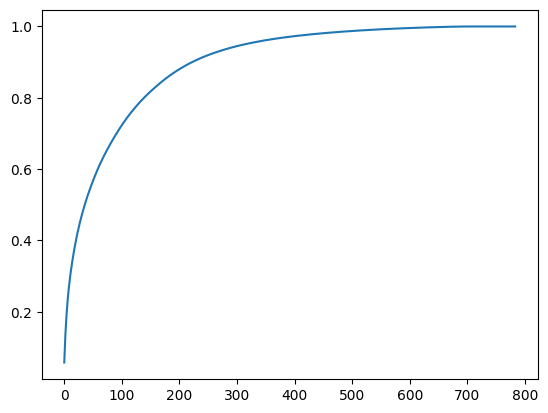

In [ ]:
plt.plot(cumulative)

In [ ]:
px.line(cumulative)